### Problem Statement:
You will be predicting the costs of used cars given the data collected from various sources and distributed across various locations in India.

#### FEATURES:

- **Name:** The brand and model of the car.

- **Location:** The location in which the car is being sold or is available for purchase.

- **Year:** The year or edition of the model.

- **Kilometers_Driven:** The total kilometres driven in the car by the previous owner(s) in KM.

- **Fuel_Type:** The type of fuel used by the car.

- **Transmission:** The type of transmission used by the car.

- **Owner_Type:** Whether the ownership is Firsthand, Second hand or other.

- **Mileage:** The standard mileage offered by the car company in kmpl or km/kg

- **Engine:** The displacement volume of the engine in cc.

- **Power:** The maximum power of the engine in bhp.

- **Seats:** The number of seats in the car.

- **New_Price:** The price of a new car of the same model.

- **Price:** The price of the used car in INR Lakhs.

In [1]:
# libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# styles
sns.set_style('white')
sns.set_palette('colorblind')

plt.style.use('seaborn-white')

In [3]:
#reading training data
train = pd.read_excel('Data_Train.xlsx')
train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [4]:
test = pd.read_excel('Data_Test.xlsx')
test['Price']=0
test.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,0
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,0
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,0
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,0
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,0


In [5]:
train.shape

(6019, 12)

In [6]:
test.shape

(1234, 12)

In [7]:
train.index

RangeIndex(start=0, stop=6019, step=1)

In [8]:
test.index = range(6019, 7253)

In [9]:
train = pd.DataFrame.append(train, test)
train.shape

(7253, 12)

In [10]:
# removing unnecessary information, to convert string to numerical value
train.Engine = train.Engine.str.partition()[0] # unit(cc) removed

train.Power = train.Power.str.partition()[0] # unit(bhp removed)

Mileage_Unit = train.Mileage.str.partition()[2]
train.Mileage = train.Mileage.str.partition()[0] 
train['Mileage_Unit'] = Mileage_Unit # different unit may help to identify Fuel_type

In [11]:
train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Mileage_Unit
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,1.75,km/kg
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,12.50,kmpl
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,4.50,kmpl
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00,kmpl
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,17.74,kmpl


In [12]:
train.shape

(7253, 13)

In [13]:
# data types
train.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
Price                float64
Mileage_Unit          object
dtype: object

In [14]:
# chnaging data type
train.Mileage = train.Mileage.astype('float64')
train.Engine = train.Engine.astype('int64', errors='ignore')
train.Power = train.Power.astype('float64', errors='ignore')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
Name                 7253 non-null object
Location             7253 non-null object
Year                 7253 non-null int64
Kilometers_Driven    7253 non-null int64
Fuel_Type            7253 non-null object
Transmission         7253 non-null object
Owner_Type           7253 non-null object
Mileage              7251 non-null float64
Engine               7207 non-null object
Power                7207 non-null object
Seats                7200 non-null float64
Price                7253 non-null float64
Mileage_Unit         7251 non-null object
dtypes: float64(3), int64(2), object(8)
memory usage: 736.7+ KB


In [15]:
# train.Year.value_counts()
# # Before 2005

In [16]:
train.Owner_Type.value_counts()

First             5952
Second            1152
Third              137
Fourth & Above      12
Name: Owner_Type, dtype: int64

In [17]:
train.Owner_Type = train.Owner_Type.replace({'Third': 'Third&Above', 'Fourth & Above': 'Third&Above'})

#### Handling Missing Values

In [18]:
# Mileage
train[train.Mileage.isna()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Mileage_Unit
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72,41,5.0,13.00,NaN
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798,73,5.0,12.75,NaN


In [19]:
train[train.Fuel_Type=='Electric']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Mileage_Unit
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72,41,5.0,13.00,NaN
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798,73,5.0,12.75,NaN


In [20]:
train = train.dropna(subset=['Mileage'])

- Whole dataset contain only 2 Electric cars, and that also in train hence dropped

In [21]:
train.shape
# #train 6017
# #test 1234

(7251, 13)

In [22]:
# Mileage with value '0'
train[train.Mileage==0]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Mileage_Unit
14,Land Rover Freelander 2 TD4 SE,Pune,2012,85000,Diesel,Automatic,Second,0.0,2179,115,5.0,17.50,kmpl
67,Mercedes-Benz C-Class Progressive C 220d,Coimbatore,2019,15369,Diesel,Automatic,First,0.0,1950,194,5.0,35.67,kmpl
79,Hyundai Santro Xing XL,Hyderabad,2005,87591,Petrol,Manual,First,0.0,1086,null,5.0,1.30,kmpl
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.0,NaN,NaN,NaN,2.95,kmpl
229,Ford Figo Diesel,Bangalore,2015,70436,Diesel,Manual,First,0.0,1498,99,NaN,3.60,kmpl
262,Hyundai Santro Xing XL,Hyderabad,2006,99000,Petrol,Manual,First,0.0,1086,null,5.0,1.75,kmpl
307,Hyundai Santro Xing XL,Chennai,2006,58000,Petrol,Manual,Second,0.0,1086,null,5.0,1.50,kmpl
424,Volkswagen Jetta 2007-2011 1.9 L TDI,Hyderabad,2010,42021,Diesel,Manual,First,0.0,1968,null,5.0,5.45,kmpl
443,Hyundai Santro GLS I - Euro I,Coimbatore,2012,50243,Petrol,Manual,First,0.0,1086,null,5.0,3.35,kmpl
544,Mercedes-Benz New C-Class Progressive C 200,Kochi,2019,13190,Petrol,Automatic,First,0.0,1950,181.43,5.0,38.99,kmpl


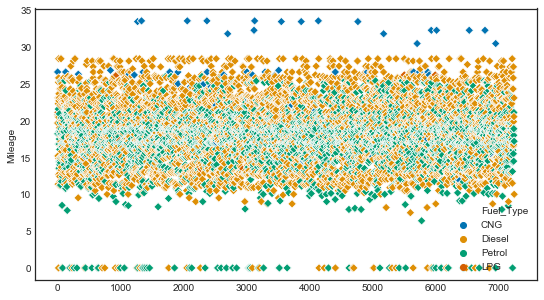

In [23]:
plt.figure(figsize=[9,5])
sns.scatterplot(train.index, train.Mileage, hue=train.Fuel_Type, marker='D')
plt.show()

In [24]:
# plt.figure(figsize=[9,5])
# sns.scatterplot(train.index, train.Mileage, hue=train.Transmission, marker='D')
# plt.show()

# train.Mileage.groupby(train.Transmission).median()

In [25]:
# plt.figure(figsize=[9,5])
# sns.scatterplot(train.index, train.Mileage, hue=train.Owner_Type, marker='D')
# plt.show()

# train.Mileage.groupby([train.Owner_Type, train.Fuel_Type]).median()

In [26]:
train.Mileage.groupby([train.Fuel_Type]).median()
train.Mileage.groupby([train.Fuel_Type, train.Transmission]).median()
train.Mileage.groupby([train.Fuel_Type, train.Transmission, train.Owner_Type]).median()
# Only, Transmission='Manual' have Fuel_Type as CNG and LPG 

Fuel_Type  Transmission  Owner_Type 
CNG        Manual        First          26.60
                         Second         26.60
                         Third&Above    17.00
Diesel     Automatic     First          16.07
                         Second         15.20
                         Third&Above    16.77
           Manual        First          21.14
                         Second         19.01
                         Third&Above    15.40
LPG        Manual        First          17.30
                         Second         13.45
Petrol     Automatic     First          16.80
                         Second         13.60
                         Third&Above    11.70
           Manual        First          18.50
                         Second         17.30
                         Third&Above    16.47
Name: Mileage, dtype: float64

In [27]:
train.Fuel_Type[(train.Mileage==0)].unique()

array(['Diesel', 'Petrol'], dtype=object)

In [28]:
# replacing missing value of Mileage with its grouped median

index=train[train.Mileage==0].index

for i in index:
    if ((train.Fuel_Type[i]=='Diesel') & (train.Transmission[i]=='Automatic')):
        if((train.Owner_Type[i]=='First')):
            train.Mileage[i]=16.07
        else:
            train.Mileage[i]=15.20
    
    elif ((train.Fuel_Type[i]=='Diesel') & (train.Transmission[i]=='Manual')):
        if((train.Owner_Type[i]=='First')):
            train.Mileage[i]=21.14
        elif((train.Owner_Type[i]=='Second')):
            train.Mileage[i]=19.01
        else:
            train.Mileage[i]=15.04
    
    elif ((train.Fuel_Type[i]=='Petrol') & (train.Transmission[i]=='Automatic')):
        if((train.Owner_Type[i]=='First')):
            train.Mileage[i]=16.80
        elif((train.Owner_Type[i]=='Second')):
            train.Mileage[i]=13.60
        else:
            train.Mileage[i]=11.70
            
    elif ((train.Fuel_Type[i]=='Petrol') & (train.Transmission[i]=='Manual')):
        if((train.Owner_Type[i]=='First')):
            train.Mileage[i]=18.50
        elif((train.Owner_Type[i]=='Second')):
            train.Mileage[i]=17.30
        else:
            train.Mileage[i]=16.47

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

---

In [29]:
# Engine
train[train.Engine.isna()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Mileage_Unit
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,18.50,NaN,NaN,NaN,2.95,kmpl
208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.10,NaN,NaN,NaN,2.11,kmpl
733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third&Above,16.10,NaN,NaN,NaN,1.75,kmpl
749,Land Rover Range Rover 3.0 D,Mumbai,2008,55001,Diesel,Automatic,Second,15.20,NaN,NaN,NaN,26.50,kmpl
1294,Honda City 1.3 DX,Delhi,2009,55005,Petrol,Manual,First,12.80,NaN,NaN,NaN,3.20,kmpl
1327,Maruti Swift 1.3 ZXI,Hyderabad,2015,50295,Petrol,Manual,First,16.10,NaN,NaN,NaN,5.80,kmpl
1385,Honda City 1.5 GXI,Pune,2004,115000,Petrol,Manual,Second,17.30,NaN,NaN,NaN,1.50,kmpl
1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,2008,69078,Petrol,Manual,First,18.50,NaN,NaN,NaN,40.88,kmpl
2074,Maruti Swift 1.3 LXI,Pune,2011,24255,Petrol,Manual,First,16.10,NaN,NaN,NaN,3.15,kmpl
2096,Hyundai Santro LP zipPlus,Coimbatore,2004,52146,Petrol,Manual,First,18.50,NaN,NaN,NaN,1.93,kmpl


In [30]:
# for visualisation purpose, know values of Engine values are used
plotengine = train[-train.Engine.isna()]
plotengine.Engine = plotengine.Engine.astype('int64')
plotengine.head(5)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Mileage_Unit
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998,58.16,5.0,1.75,km/kg
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,12.50,kmpl
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.7,5.0,4.50,kmpl
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00,kmpl
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.8,5.0,17.74,kmpl


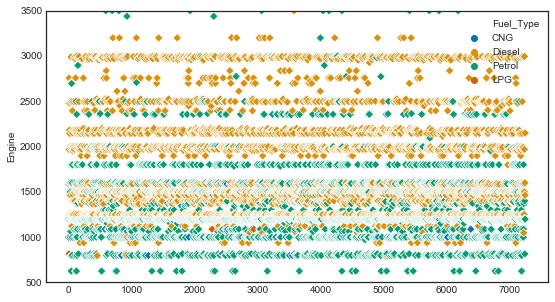

In [31]:
plt.figure(figsize=[9,5])
sns.scatterplot(plotengine.index, plotengine.Engine, hue=plotengine.Fuel_Type, marker='D')
plt.ylim(500, 3500)
plt.show()

In [32]:
# plt.figure(figsize=[9,5])
# sns.scatterplot(plotengine.index, plotengine.Engine, hue=plotengine.Transmission)
# plt.ylim(500,3500)
# plt.show()

# plotengine.Engine.groupby(plotengine.Transmission).median()

In [33]:
engmisname = np.array(train.Name[train.Engine.isna()].unique())
engmisname

array(['Honda City 1.5 GXI', 'Maruti Swift 1.3 VXi',
       'Land Rover Range Rover 3.0 D', 'Honda City 1.3 DX',
       'Maruti Swift 1.3 ZXI',
       'Land Rover Range Rover Sport 2005 2012 Sport',
       'Maruti Swift 1.3 LXI', 'Hyundai Santro LP zipPlus',
       'Toyota Etios Liva V', 'Maruti Swift 1.3 VXI ABS',
       'BMW 5 Series 520d Sedan', 'Hyundai Santro GLS II - Euro II',
       'Maruti Wagon R Vx', 'Honda CR-V AT With Sun Roof',
       'Fiat Punto 1.3 Emotion', 'Hyundai Santro Xing XG',
       'Honda Jazz Select Edition', 'Fiat Punto 1.2 Dynamic',
       'Fiat Punto 1.4 Emotion', 'Skoda Laura 1.8 TSI Ambition',
       'Toyota Etios Liva Diesel TRD Sportivo',
       'Hyundai i20 new Sportz AT 1.4', 'Mahindra TUV 300 P4'],
      dtype=object)

In [34]:
for i in range(len(engmisname)):
    print(i, (train[(train.Engine.isna()==False)][train.Name==engmisname[i]])[['Engine', 'Power']])
    print()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed 

0      Engine Power
3305   1493   100
4767   1493   100

1 Empty DataFrame
Columns: [Engine, Power]
Index: []

2 Empty DataFrame
Columns: [Engine, Power]
Index: []

3 Empty DataFrame
Columns: [Engine, Power]
Index: []

4 Empty DataFrame
Columns: [Engine, Power]
Index: []

5 Empty DataFrame
Columns: [Engine, Power]
Index: []

6 Empty DataFrame
Columns: [Engine, Power]
Index: []

7 Empty DataFrame
Columns: [Engine, Power]
Index: []

8      Engine Power
4138   1197  78.9

9 Empty DataFrame
Columns: [Engine, Power]
Index: []

10 Empty DataFrame
Columns: [Engine, Power]
Index: []

11 Empty DataFrame
Columns: [Engine, Power]
Index: []

12 Empty DataFrame
Columns: [Engine, Power]
Index: []

13 Empty DataFrame
Columns: [Engine, Power]
Index: []

14 Empty DataFrame
Columns: [Engine, Power]
Index: []

15 Empty DataFrame
Columns: [Engine, Power]
Index: []

16      Engine Power
3145   1198  88.8

17 Empty DataFrame
Columns: [Engine, Power]
Index: []

18 Empty DataFrame
Columns: [Engine, Power]
Ind

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [35]:
for i in range(len(engmisname)):
    train.Engine[train.Name==engmisname[0]]=1493
    train.Power[train.Name==engmisname[0]]=100
    
    train.Engine[train.Name==engmisname[8]]=1197
    train.Power[train.Name==engmisname[8]]=178.9
    
    train.Engine[train.Name==engmisname[16]]=1198
    train.Power[train.Name==engmisname[16]]=88.8

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

In [36]:
plotengine = train[-train.Engine.isna()]
plotengine.Engine = plotengine.Engine.astype('int64')

plotengine.Engine.groupby([plotengine.Fuel_Type, plotengine.Transmission]).median()

Fuel_Type  Transmission
CNG        Manual           998
Diesel     Automatic       2143
           Manual          1461
LPG        Manual          1061
Petrol     Automatic       1591
           Manual          1197
Name: Engine, dtype: int64

In [37]:
fuel=plotengine.Fuel_Type.unique()
fuel

array(['CNG', 'Diesel', 'Petrol', 'LPG'], dtype=object)

In [38]:
# replacing missing value with median

index=train[train.Engine.isna()].index

for i in index:
    if (train.Fuel_Type[i]=='CNG'):
        train.Engine[i]=998
    elif (train.Fuel_Type[i]=='Diesel'):
        if(train.Transmission[i]=='Automatic'):
            train.Engine[i]=2143
        else:
            train.Engine[i]=1461
    elif (train.Fuel_Type[i]=='Petrol'):
        if(train.Transmission[i]=='Automatic'):
            train.Engine[i]=1591
        else:
            train.Engine[i]=1197
    else:
        train.Engine[i]=1061

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_lau

In [39]:
train.Engine = train.Engine.astype('int64')

---

In [40]:
# Power
train[train.Power.isna() | (train.Power=='null')]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Mileage_Unit
76,Ford Fiesta 1.4 SXi TDCi,Jaipur,2008,111111,Diesel,Manual,First,17.80,1399,null,5.0,2.00,kmpl
79,Hyundai Santro Xing XL,Hyderabad,2005,87591,Petrol,Manual,First,18.50,1086,null,5.0,1.30,kmpl
89,Hyundai Santro Xing XO,Hyderabad,2007,73745,Petrol,Manual,First,17.00,1086,null,5.0,2.10,kmpl
120,Hyundai Santro Xing XL eRLX Euro III,Mumbai,2005,102000,Petrol,Manual,Second,17.00,1086,null,5.0,0.85,kmpl
143,Hyundai Santro Xing XO eRLX Euro II,Kochi,2008,80759,Petrol,Manual,Third&Above,17.00,1086,null,5.0,1.67,kmpl
208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.10,1197,NaN,NaN,2.11,kmpl
227,Maruti Swift VDI BSIV,Delhi,2013,47000,Diesel,Manual,First,17.80,1248,null,5.0,4.10,kmpl
245,Hyundai Santro Xing XO eRLX Euro II,Mumbai,2007,72000,Petrol,Manual,Third&Above,17.00,1086,null,5.0,0.95,kmpl
262,Hyundai Santro Xing XL,Hyderabad,2006,99000,Petrol,Manual,First,18.50,1086,null,5.0,1.75,kmpl
307,Hyundai Santro Xing XL,Chennai,2006,58000,Petrol,Manual,Second,17.30,1086,null,5.0,1.50,kmpl


In [41]:
# for visualisation purpose, know values of Engine values are used
plotpower = train[-train.Power.isna() & -(train.Power=='null')]
plotpower.Power = plotpower.Power.astype('float64')
plotpower.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Mileage_Unit
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998,58.16,5.0,1.75,km/kg
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5.0,12.50,kmpl
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5.0,4.50,kmpl
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00,kmpl
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.80,5.0,17.74,kmpl


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


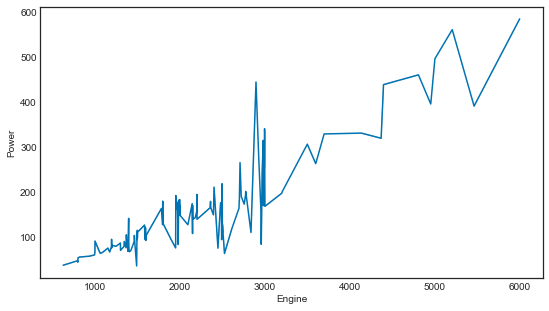

In [42]:
plt.figure(figsize=[9,5])
sns.lineplot(plotpower.Engine, plotpower.Power, ci=False)
plt.show()

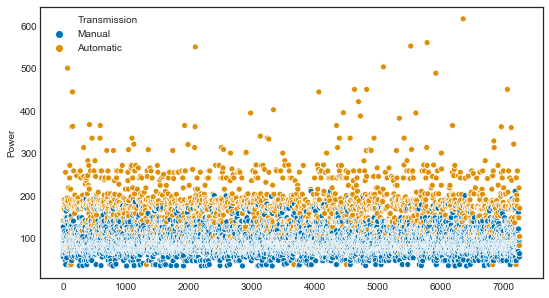

In [43]:
plt.figure(figsize=[9,5])
sns.scatterplot(plotpower.index, plotpower.Power, hue=plotpower.Transmission)
plt.show()

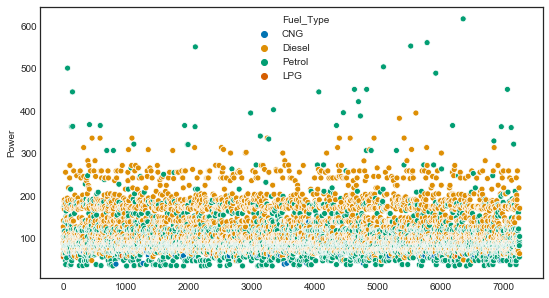

In [44]:
plt.figure(figsize=[9,5])
sns.scatterplot(plotpower.index, plotpower.Power, hue=plotpower.Fuel_Type)
plt.show()

In [45]:
plotpower.Power.groupby([plotpower.Fuel_Type, plotpower.Transmission]).median()

Fuel_Type  Transmission
CNG        Manual           58.20
Diesel     Automatic       175.56
           Manual           89.92
LPG        Manual           58.20
Petrol     Automatic       118.00
           Manual           81.86
Name: Power, dtype: float64

In [46]:
fuel = plotpower.Fuel_Type.unique()
fuel

array(['CNG', 'Diesel', 'Petrol', 'LPG'], dtype=object)

In [47]:
# replacing missing value with median

index=train[train.Power.isna() | (train.Power=='null')].index

for i in index:
    if ((train.Fuel_Type[i]=='CNG') | (train.Fuel_Type[i]=='LPG')):
        train.Power[i]=58.2
    elif (train.Fuel_Type[i]=='Diesel'):
        if(train.Transmission[i]=='Automatic'):
            train.Power[i]=175.56
        else:
            train.Power[i]=89.92
    else:
        if(train.Transmission[i]=='Automatic'):
            train.Power[i]=118
        else:
            train.Power[i]=81.86

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: Sett

In [48]:
train.Power = train.Power.astype('float64')

---

In [49]:
# Seats
train[train.Seats.isna()| (train.Seats==0)]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Mileage_Unit
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,18.50,1493,100.00,NaN,2.95,kmpl
208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.10,1197,81.86,NaN,2.11,kmpl
229,Ford Figo Diesel,Bangalore,2015,70436,Diesel,Manual,First,21.14,1498,99.00,NaN,3.60,kmpl
733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third&Above,16.10,1197,81.86,NaN,1.75,kmpl
749,Land Rover Range Rover 3.0 D,Mumbai,2008,55001,Diesel,Automatic,Second,15.20,2143,175.56,NaN,26.50,kmpl
1294,Honda City 1.3 DX,Delhi,2009,55005,Petrol,Manual,First,12.80,1197,81.86,NaN,3.20,kmpl
1327,Maruti Swift 1.3 ZXI,Hyderabad,2015,50295,Petrol,Manual,First,16.10,1197,81.86,NaN,5.80,kmpl
1385,Honda City 1.5 GXI,Pune,2004,115000,Petrol,Manual,Second,17.30,1493,100.00,NaN,1.50,kmpl
1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,2008,69078,Petrol,Manual,First,18.50,1197,81.86,NaN,40.88,kmpl
1917,Honda City 1.5 EXI,Jaipur,2005,88000,Petrol,Manual,Second,13.00,1493,100.00,NaN,1.70,kmpl


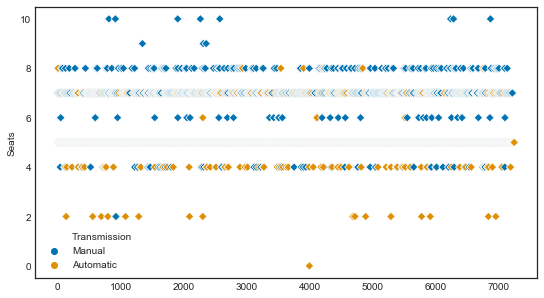

In [50]:
plt.figure(figsize=[9,5])
sns.scatterplot(train.index, train.Seats, hue=train.Transmission, marker='D')
plt.show()

In [51]:
# plt.figure(figsize=[9,5])
# sns.scatterplot(train.index, train.Price, hue=train.Fuel_Type, marker='D')
# plt.show()

In [52]:
train.head(1)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Mileage_Unit
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,1.75,km/kg


In [53]:
train.Seats.groupby([train.Transmission, train.Fuel_Type]).median()

Transmission  Fuel_Type
Automatic     Diesel       5.0
              Petrol       5.0
Manual        CNG          5.0
              Diesel       5.0
              LPG          5.0
              Petrol       5.0
Name: Seats, dtype: float64

In [54]:
train.Seats[(train.Seats.isna()) | (train.Seats==0)] = 5

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [55]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7251 entries, 0 to 7252
Data columns (total 13 columns):
Name                 7251 non-null object
Location             7251 non-null object
Year                 7251 non-null int64
Kilometers_Driven    7251 non-null int64
Fuel_Type            7251 non-null object
Transmission         7251 non-null object
Owner_Type           7251 non-null object
Mileage              7251 non-null float64
Engine               7251 non-null int64
Power                7251 non-null float64
Seats                7251 non-null float64
Price                7251 non-null float64
Mileage_Unit         7251 non-null object
dtypes: float64(4), int64(3), object(6)
memory usage: 1.1+ MB


---
---

In [56]:
train.corr()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
Year,1.000000,-0.187881,0.296919,-0.051696,0.027086,0.010527,0.262217
Kilometers_Driven,-0.187881,1.000000,-0.069654,0.094713,0.028129,0.090760,-0.010327
Mileage,0.296919,-0.069654,1.000000,-0.638698,-0.543037,-0.346251,-0.288274
Engine,-0.051696,0.094713,-0.638698,1.000000,0.855251,0.402536,0.578050
Power,0.027086,0.028129,-0.543037,0.855251,1.000000,0.096094,0.674219
Seats,0.010527,0.090760,-0.346251,0.402536,0.096094,1.000000,0.045443
Price,0.262217,-0.010327,-0.288274,0.578050,0.674219,0.045443,1.000000


In [57]:
train.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,7251.000000,7.251000e+03,7251.000000,7251.000000,7251.000000,7251.000000,7251.000000
mean,2013.365329,5.870229e+04,18.336163,1615.614398,112.340798,5.278444,7.865283
std,3.254604,8.443913e+04,4.138850,594.090758,53.068168,0.806766,10.797454
min,1996.000000,1.710000e+02,6.400000,624.000000,34.200000,2.000000,0.000000
25%,2011.000000,3.400000e+04,15.300000,1197.000000,77.000000,5.000000,2.280000
50%,2014.000000,5.344200e+04,18.200000,1493.000000,92.000000,5.000000,4.650000
75%,2016.000000,7.300000e+04,21.100000,1968.000000,138.030000,5.000000,8.400000
max,2019.000000,6.500000e+06,33.540000,5998.000000,616.000000,10.000000,160.000000


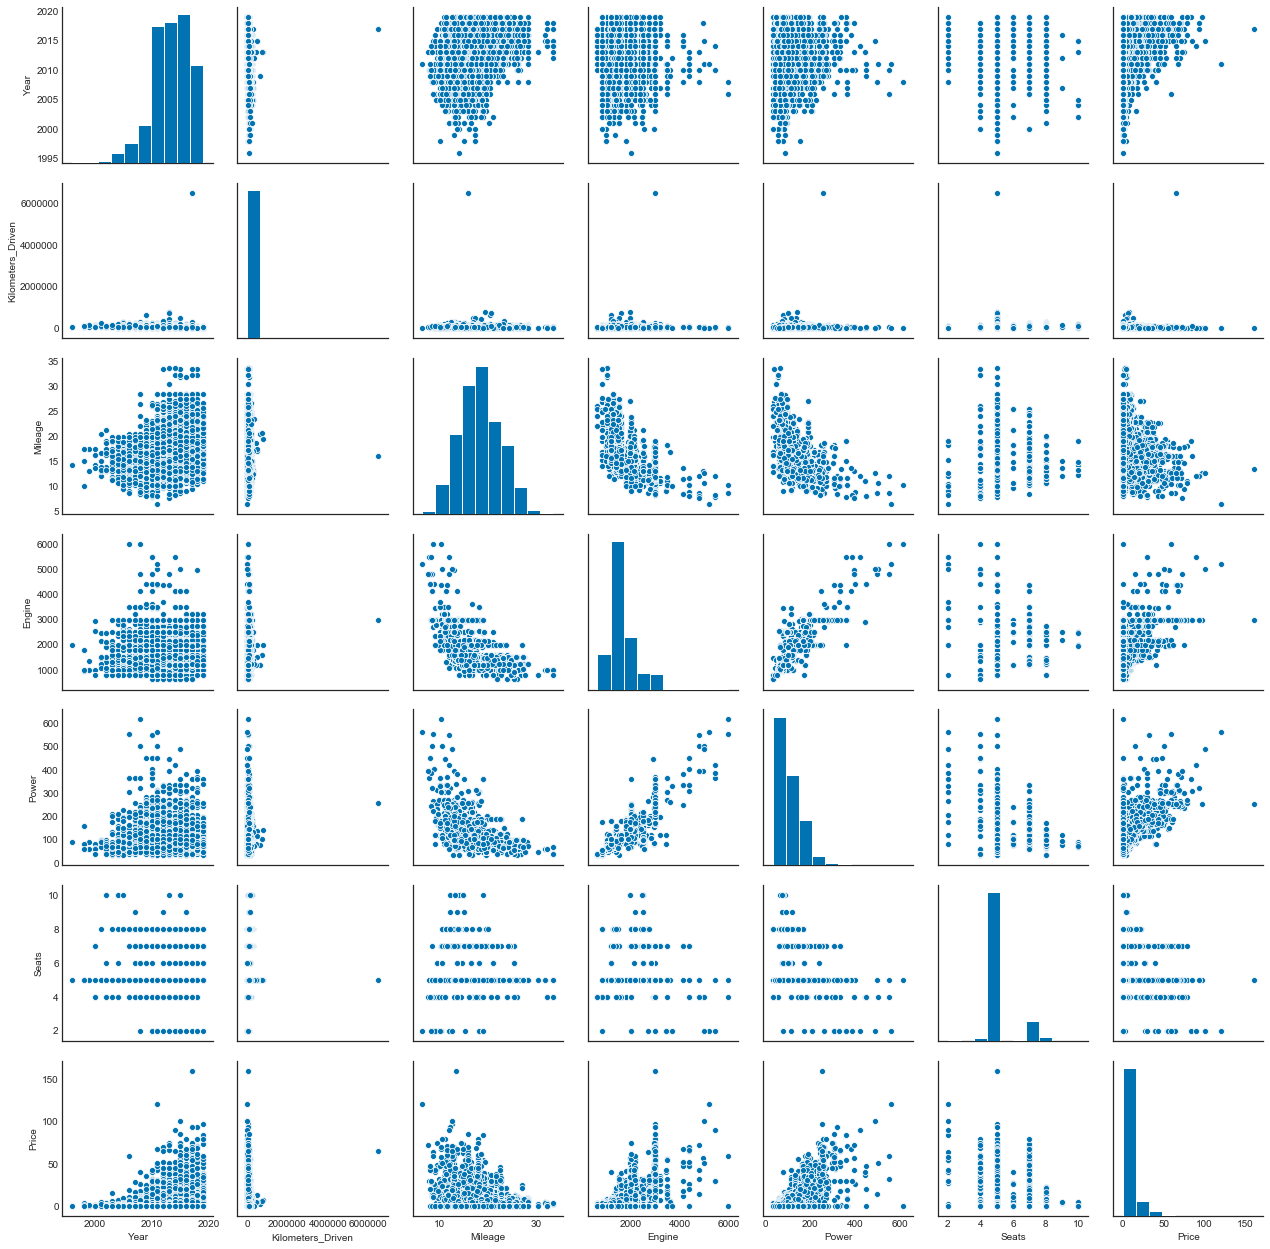

In [58]:
sns.pairplot(train)
plt.show()

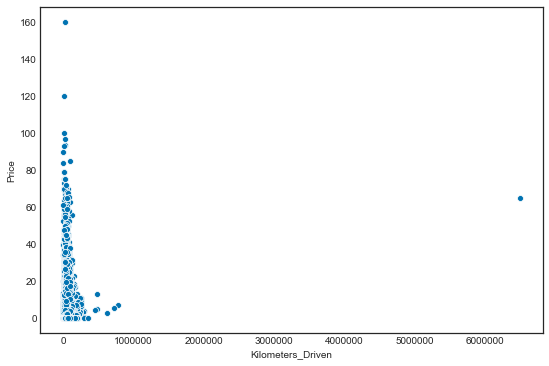

In [59]:
plt.figure(figsize=[9,6])
sns.scatterplot(train.Kilometers_Driven, train.Price)
plt.show()

In [60]:
train[train.Kilometers_Driven==train.Kilometers_Driven.max()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Mileage_Unit
2328,BMW X5 xDrive 30d M Sport,Chennai,2017,6500000,Diesel,Automatic,First,15.97,2993,258.0,5.0,65.0,kmpl


In [61]:
# updating wring value
train.Kilometers_Driven[train.index==2328] = 650000

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [62]:
train.Kilometers_Driven.max()

775000

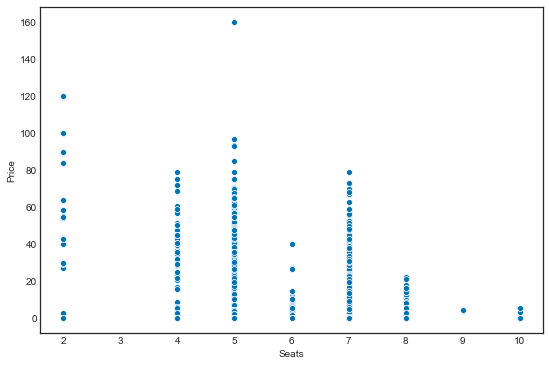

In [63]:
plt.figure(figsize=[9,6])
sns.scatterplot(train.Seats, train.Price)
plt.show()

In [64]:
train[train.Price==train.Price.max()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Mileage_Unit
4079,Land Rover Range Rover 3.0 Diesel LWB Vogue,Hyderabad,2017,25000,Diesel,Automatic,First,13.33,2993,255.0,5.0,160.0,kmpl


In [65]:
train[(train.Power==255) | (train.Engine==2993)].Price.median()

31.375

In [66]:
train.Price[train.Price==train.Price.max()]=60

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


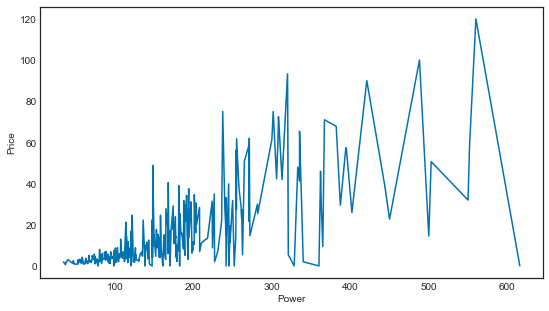

In [67]:
plt.figure(figsize=[9,5])
sns.lineplot(train.Power, train.Price, ci=False)
plt.show()

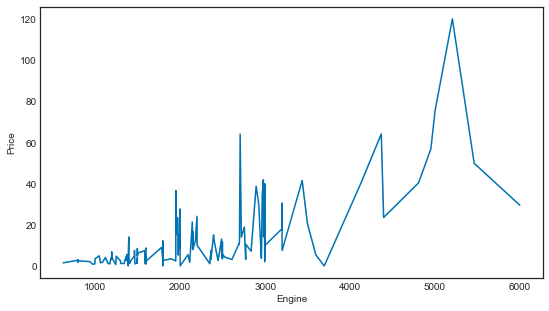

In [68]:
plt.figure(figsize=[9,5])
sns.lineplot(train.Engine, train.Price, ci=False)
plt.show()

In [69]:
train = train.reset_index(drop=True)

In [70]:
carnames = train.Name.str.split()
carnames.head()

0               [Maruti, Wagon, R, LXI, CNG]
1    [Hyundai, Creta, 1.6, CRDi, SX, Option]
2                           [Honda, Jazz, V]
3                      [Maruti, Ertiga, VDI]
4     [Audi, A4, New, 2.0, TDI, Multitronic]
Name: Name, dtype: object

In [71]:
# extracting car Brand from 'Name'
Brand = []

for i in range(len(train)):
    if(carnames[i][0]=='Land'):
        Brand.append(carnames[i][0:2])
    else:
        Brand.append(carnames[i][0])

In [72]:
dfbrand = pd.DataFrame()
dfbrand['Brand'] = Brand

for i in range(len(train)):
    if(type(dfbrand.Brand[i])==list):
        dfbrand.Brand[i] = 'Land Rover'
        
dfbrand.head()

,Brand
0,Maruti
1,Hyundai
2,Honda
3,Maruti
4,Audi


In [73]:
train['Brand'] = dfbrand.Brand

In [74]:
train = train[['Name', 'Brand', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Mileage_Unit', 'Engine',
       'Power', 'Seats', 'Price']]
train.head()

,Name,Brand,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Mileage_Unit,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.60,km/kg,998,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67,kmpl,1582,126.20,5.0,12.50
2,Honda Jazz V,Honda,Chennai,2011,46000,Petrol,Manual,First,18.20,kmpl,1199,88.70,5.0,4.50
3,Maruti Ertiga VDI,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77,kmpl,1248,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,kmpl,1968,140.80,5.0,17.74


In [75]:
train.Brand.unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land Rover', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini', 'Hindustan', 'OpelCorsa'], dtype=object)

In [76]:
train.Brand = train.Brand.replace({'ISUZU': 'Isuzu', 'Mini':'Mini Cooper', 'OpelCorsa':'Opel'})

In [77]:
train.Brand.value_counts()

Maruti           1444
Hyundai          1340
Honda             743
Toyota            506
Mercedes-Benz     380
Volkswagen        374
Ford              351
Mahindra          330
BMW               312
Audi              285
Tata              228
Skoda             202
Renault           170
Chevrolet         151
Nissan            117
Land Rover         67
Jaguar             48
Fiat               38
Mitsubishi         36
Mini Cooper        31
Volvo              28
Porsche            19
Jeep               19
Datsun             17
Isuzu               5
Force               3
Bentley             2
Ambassador          1
Opel                1
Lamborghini         1
Smart               1
Hindustan           1
Name: Brand, dtype: int64

In [78]:
others = train.Brand.value_counts()[train.Brand.value_counts()<100]
others

Land Rover     67
Jaguar         48
Fiat           38
Mitsubishi     36
Mini Cooper    31
Volvo          28
Porsche        19
Jeep           19
Datsun         17
Isuzu           5
Force           3
Bentley         2
Ambassador      1
Opel            1
Lamborghini     1
Smart           1
Hindustan       1
Name: Brand, dtype: int64

In [79]:
for i in range(len(others)):
    train.Brand[train.Brand == others.index[i]] = 'Others'

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [80]:
train.Brand.value_counts()

Maruti           1444
Hyundai          1340
Honda             743
Toyota            506
Mercedes-Benz     380
Volkswagen        374
Ford              351
Mahindra          330
Others            318
BMW               312
Audi              285
Tata              228
Skoda             202
Renault           170
Chevrolet         151
Nissan            117
Name: Brand, dtype: int64

---

In [81]:
trainbackup = train

In [82]:
trainbackup.head(1)

,Name,Brand,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Mileage_Unit,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.6,km/kg,998,58.16,5.0,1.75


In [83]:
# transformations, as data is positively skewed

train.Price = np.power(train.Price, 1/4)
train.Kilometers_Driven = np.power(train.Kilometers_Driven, 1/4)
train.Engine = np.power(train.Engine, 1/4)
train.Power = np.power(train.Power, 1/4)
train.Mileage = np.power(train.Mileage, 1/4)
train.Year = np.power(train.Year, 1/4)
train.Seats = np.power(train.Seats, 1/4)

In [84]:
# sns.pairplot(train)

In [85]:
X = train.drop(['Price','Name', 'Mileage_Unit'], axis=1)
y = train.Price

In [86]:
X.head()

,Brand,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti,Mumbai,6.695747,16.380725,CNG,Manual,First,2.271017,5.620599,2.761570,1.495349
1,Hyundai,Pune,6.699907,14.229707,Diesel,Manual,First,2.105965,6.306692,3.351698,1.495349
2,Honda,Chennai,6.696579,14.645003,Petrol,Manual,First,2.065465,5.884435,3.068887,1.495349
3,Maruti,Chennai,6.697412,17.174330,Diesel,Manual,First,2.134809,5.943656,3.069406,1.626577
4,Audi,Coimbatore,6.698244,14.200987,Diesel,Automatic,Second,1.974517,6.660491,3.444694,1.495349


In [87]:
X = pd.get_dummies(X, drop_first=True)
X.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Brand_BMW,Brand_Chevrolet,Brand_Ford,Brand_Honda,...,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Second,Owner_Type_Third&Above
0,6.695747,16.380725,2.271017,5.620599,2.761570,1.495349,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,6.699907,14.229707,2.105965,6.306692,3.351698,1.495349,0,0,0,0,...,0,0,0,1,1,0,0,1,0,0
2,6.696579,14.645003,2.065465,5.884435,3.068887,1.495349,0,0,0,1,...,0,0,0,0,0,0,1,1,0,0
3,6.697412,17.174330,2.134809,5.943656,3.069406,1.626577,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,6.698244,14.200987,1.974517,6.660491,3.444694,1.495349,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [88]:
X.shape

(7251, 37)

In [89]:
forxtrain = X.iloc[:6017]
X_test = X.iloc[6017:]

forytrain = y.iloc[:6017]
y_test = y.iloc[6017:]

In [90]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(forxtrain, forytrain, test_size=0.25, random_state=42, stratify=forxtrain.Year)

In [91]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# from sklearn.tree import DecisionTreeRegressor
# dt = DecisionTreeRegressor(random_state=42, max_depth=7, min_samples_split=5, max_features=15, min_samples_leaf=3)

# from sklearn.ensemble import RandomForestRegressor
# rf = RandomForestRegressor(random_state=42, n_estimators=500, max_depth=8, min_samples_split=10, min_samples_leaf=8, max_features=18)

# from sklearn.neighbors import KNeighborsRegressor
# knn = KNeighborsRegressor()

In [92]:
# # Model

# dt.fit(X_train, y_train)
# y_valid_pred = dt.predict(X_valid)

# print('Validation', r2_score(y_valid**4, y_valid_pred**4))
# print('Train', r2_score(y_train**4, dt.predict(X_train)**4))

In [93]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [94]:
y_valid_pred = lr.predict(X_valid)

In [95]:
from sklearn.metrics import r2_score, mean_squared_log_error

In [96]:
np.sqrt(mean_squared_log_error(y_valid**4, y_valid_pred**4))

0.23594761254939267

In [97]:
np.sqrt(mean_squared_log_error(y_train**4, lr.predict(X_train)**4))

0.21330400691866136

In [98]:
r2_score(y_valid**4, y_valid_pred**4)

0.8199329111999547

In [99]:
r2_score(y_train**4, lr.predict(X_train)**4)

0.8585135788559872

In [100]:
# KNeighborsRegressor(n_neighbors=9, n_jobs=-1)
# Test 82.16
# Train 85.35

In [101]:
# RandomForestRegressor(random_state=42, n_estimators=500, max_depth=8, min_samples_split=10, min_samples_leaf=8, max_features=18)
# Test 89.04
# Train 93.21

In [102]:
# DecisionTreeRegressor(random_state=42, max_depth=7, min_samples_split=5, max_features=15, min_samples_leaf=3)
# Test 85.09
# Train 88.92

In [103]:
check = pd.DataFrame()
check['True_Price'] = np.power(y_valid, 4)
check['Predicted_Price'] = np.power(y_valid_pred, 4)
check['Residuals'] = np.abs(check.True_Price - check.Predicted_Price)
check.head()

,True_Price,Predicted_Price,Residuals
1456,2.00,2.116614,0.116614
3127,9.51,8.085912,1.424088
161,10.90,12.294215,1.394215
3469,9.75,10.728669,0.978669
2721,6.63,7.894051,1.264051


In [104]:
check.Residuals.max()

67.50755410857413

In [105]:
# coef = (np.round(lr.coef_, decimals=3))
# column_name = forxtrain.columns
# coefficient = pd.DataFrame()
# coefficient['coef'] = coef
# coefficient['column_name'] = column_name

# coefficient.head()

---
### Testing


In [106]:
y_pred = lr.predict(X_test)
y_pred = np.power(y_pred, 4)
y_pred

array([ 2.82870024,  2.12350902, 17.24748203, ...,  2.57622262,
        4.42813456, 22.91477075])

In [107]:
Prediction = pd.DataFrame()
Prediction['Price'] = y_pred
Prediction.head()

,Price
0,2.828700
1,2.123509
2,17.247482
3,5.393121
4,4.052784


In [108]:
Prediction.to_excel('Test_Predictions.xlsx')

In [109]:
# Prediction.to_csv('Test_Predictions.csv',index=False)